### Dataset Description

The dataset named "Heart Disease Dataset" comes from a study conducted in 1988 and originates from the UCI Machine Learning Repository. The task is to get the best predictor and guess if a patient has a heart disease.

The dataset consists of 303 individuals data. There are 14 columns in the dataset, which are described below.


**1. Age:** The person’s age in years

**2. Sex:** The person’s Gender (1 = male, 0 = female)

**3. cp - chest pain type:** The type of chest pain experienced by the individual person



*  0: typical angina

*  1: atypical angina

*  2: non-anginal pain

*  3: asymptotic


**4. trestbps - Resting Blood Pressure:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**5. chol - Serum Cholestrol:** The person’s cholesterol measurement in mg/dl

**6. fbs - Fasting Blood Sugar:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

**7. restecg - Resting ECG:** resting electrocardiographic results

*   0: normal
*   1: having ST-T wave abnormality
*   2: left ventricular hyperthrophy


**8. thalach - Max heart rate achieved:** The person’s maximum heart rate achieved

**9. exang - Exercise induced angina:** Exercise induced angina (1 = yes; 0 = no)

**10. oldpeak - ST depression induced by exercise relative to rest:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot.)

**11. slope - Peak exercise ST segment:** The slope of the peak exercise ST segment


*  0: downsloping
*  1: flat
*  2: upsloping


**12. ca - Number of major vessels (0–3) colored by flourosopy:** The number of major vessels (0–3)

**13. thal:** A blood disorder called thalassemia


*   0: NULL (dropped from the dataset)
*   1: fixed defect (no blood flow in some part of the heart)
*   2: normal blood flow
*   3: reversible defect (a blood flow is observed but it is not normal)

**14. target:** Heart disease (1 = no, 0= yes)

Data source to this experiment : http://archive.ics.uci.edu/ml/datasets/statlog+(heart)



**Problem description:**

The goal is to predict the binary class Heart Disease (target), which represents whether or not a patient has heart disease:

0 represents no heart disease present

1 represents heart disease present

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from time import time

In [2]:
df = pd.read_csv('Heart_Disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df.shape

(302, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [11]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

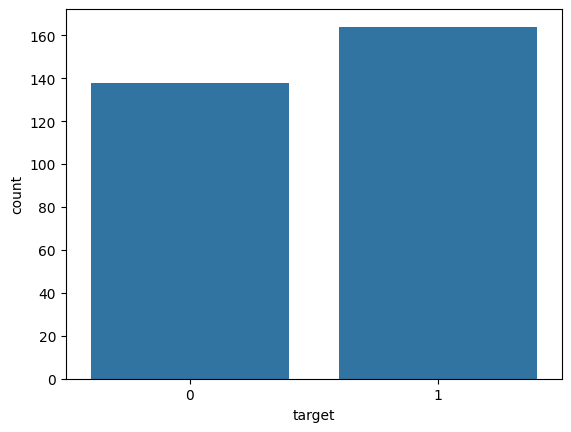

In [12]:
sns.countplot(x=df['target'])

In [13]:
# Percentage of Heart Disease and No Heart Disease
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.70%
Percentage of Patients Have Heart Disease: 54.30%


In [14]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


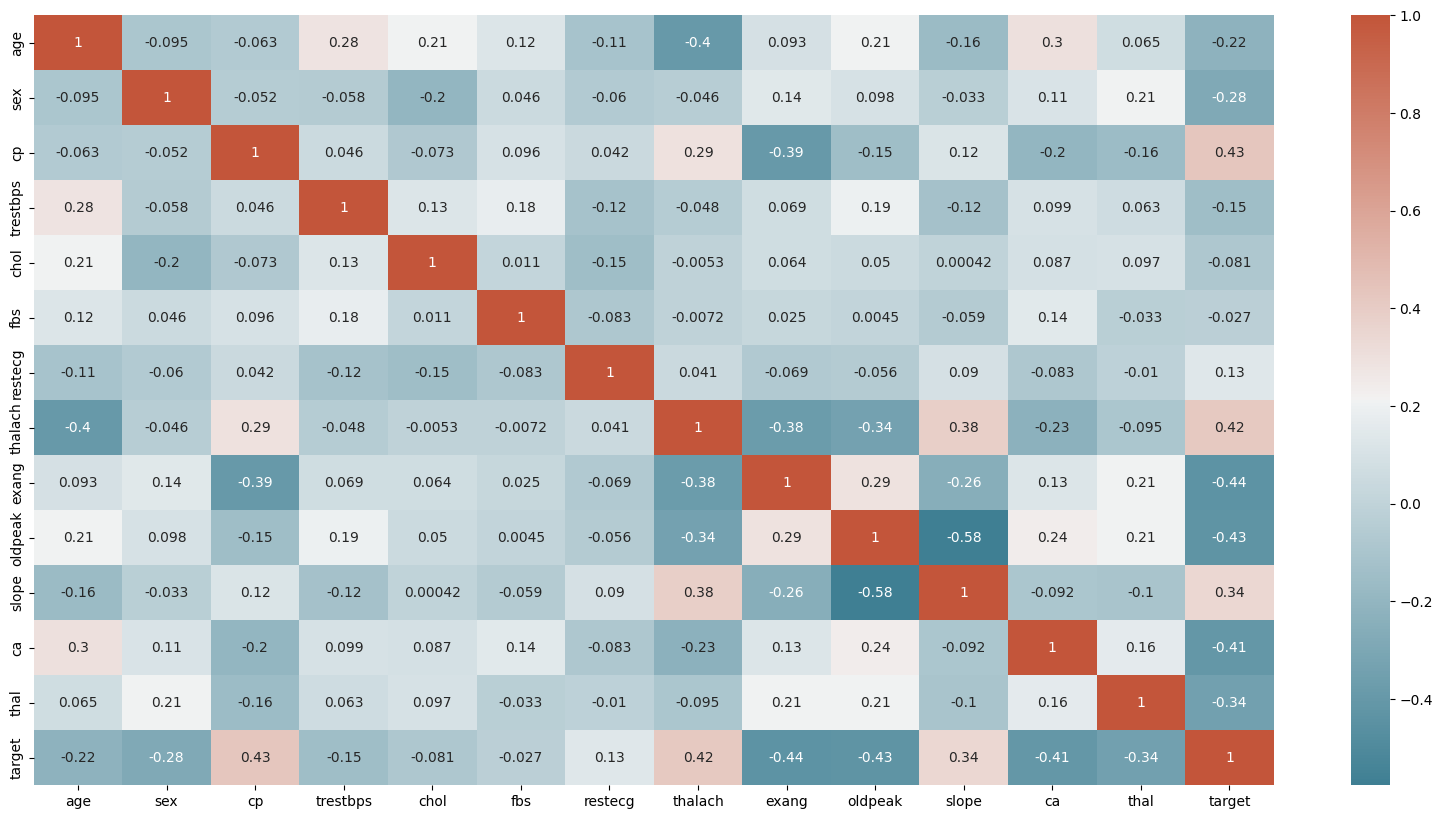

In [15]:
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True));

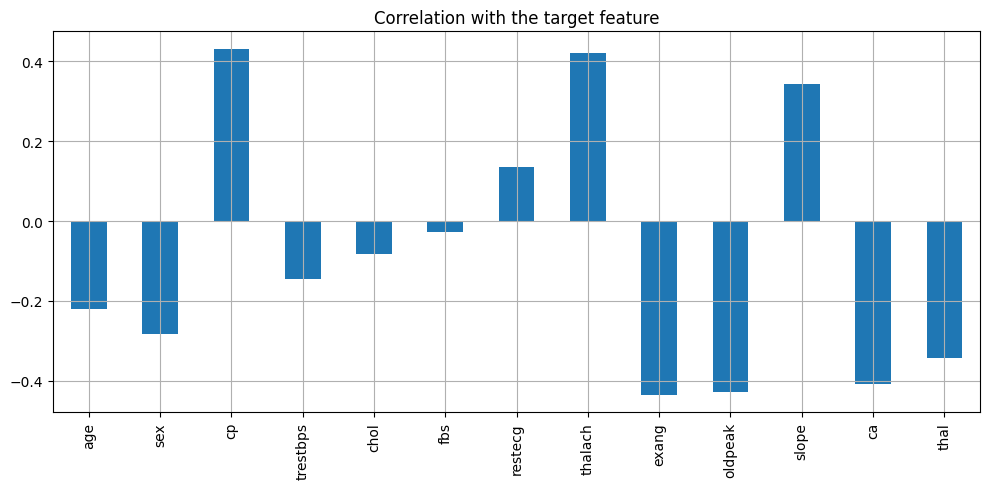

In [16]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(10, 5),
                                                        title="Correlation with the target feature")
plt.tight_layout()

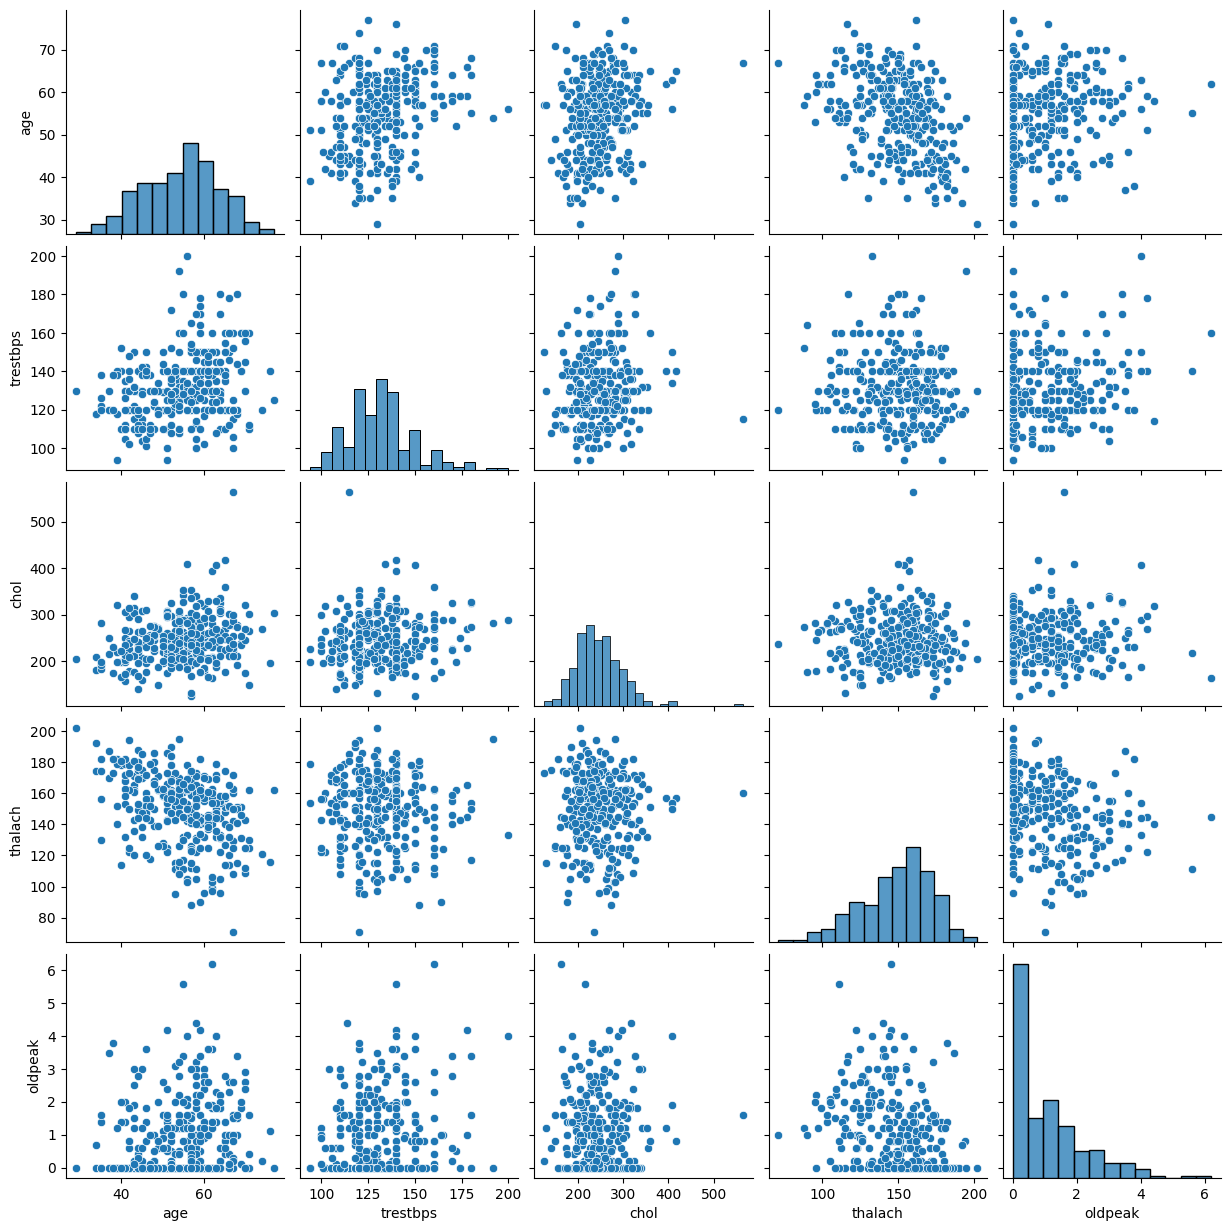

In [17]:
subData = df[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(subData);

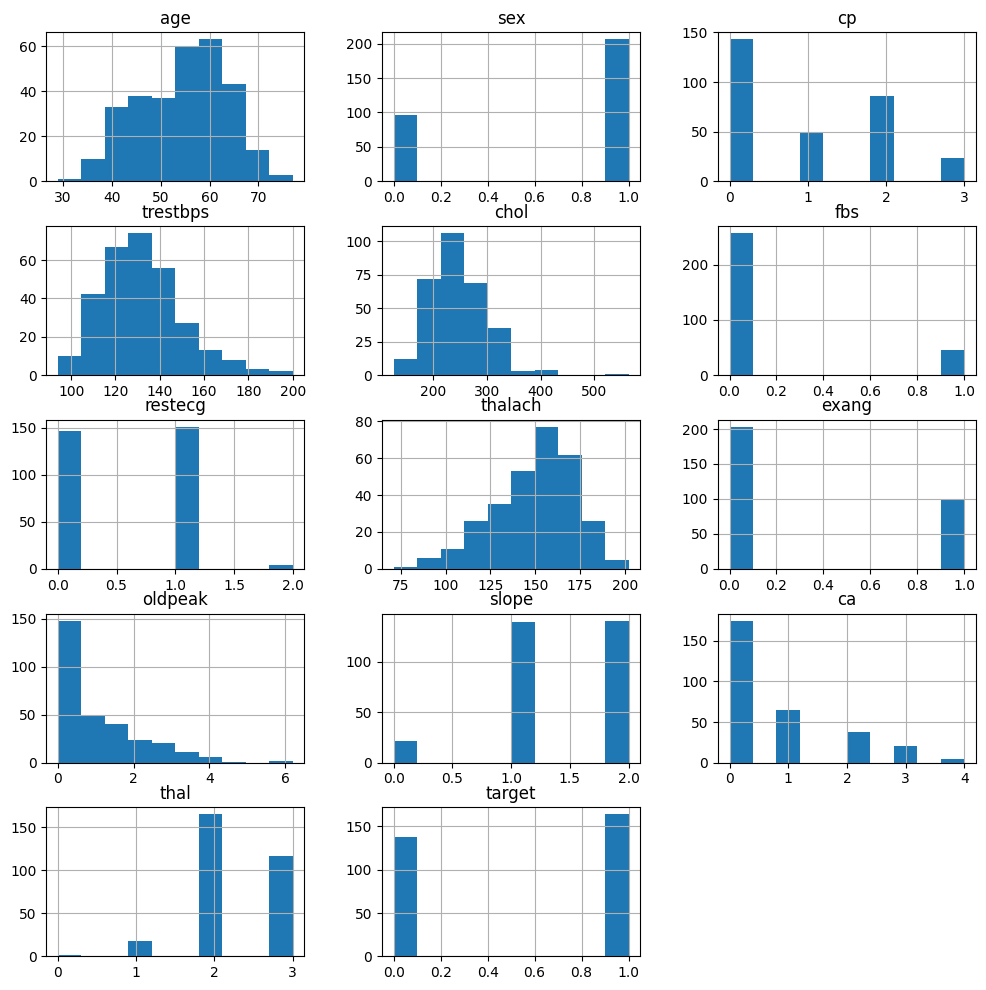

In [18]:
df.hist(figsize=(12,12), layout=(5,3))

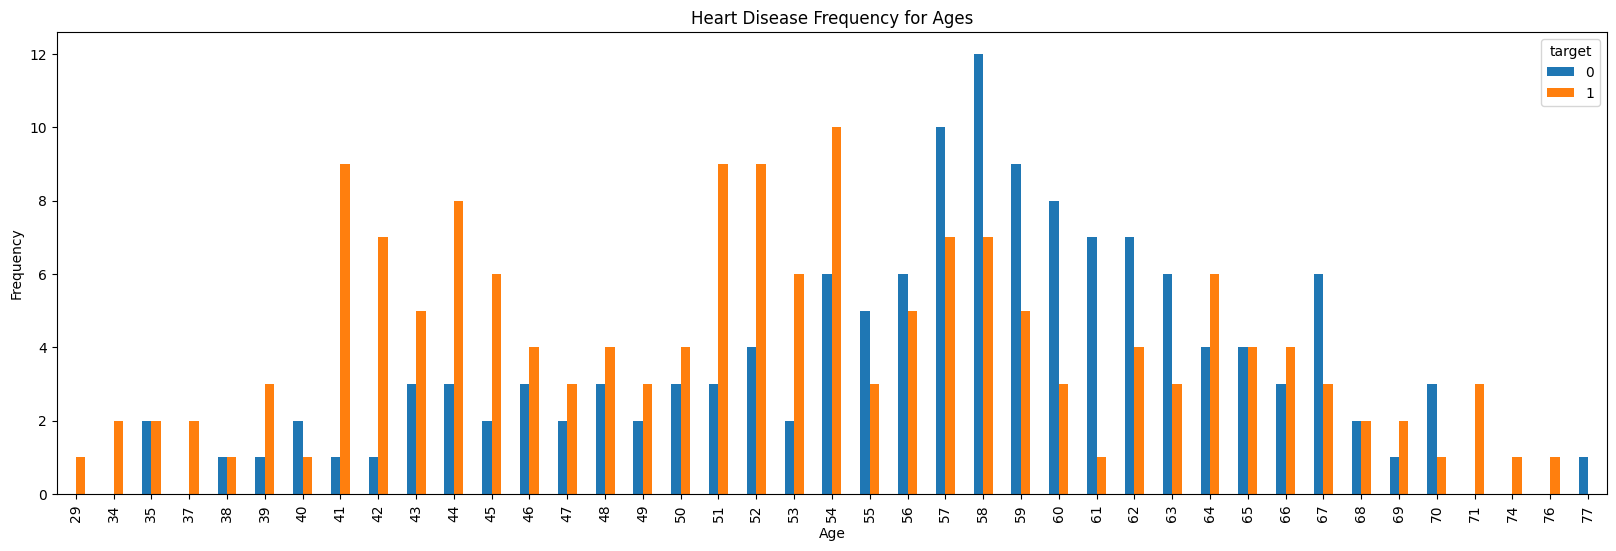

In [19]:
pd.crosstab(df.age, df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')m
plt.show()

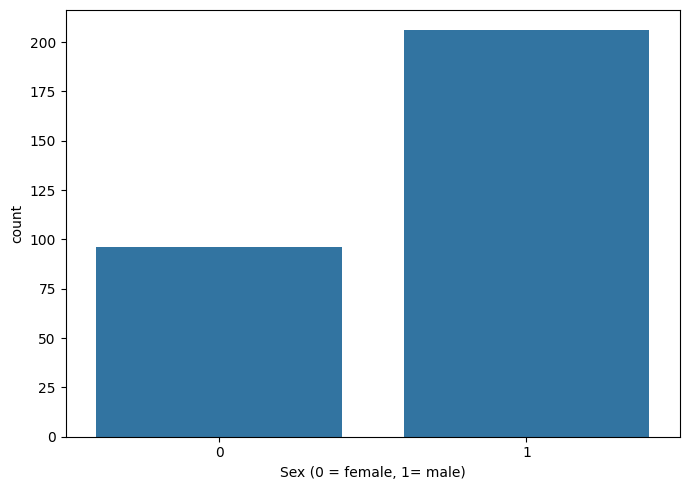

In [20]:
plt.figure(figsize=(7,5))
sns.countplot(x=df['sex'])
plt.xlabel("Sex (0 = female, 1= male)")
plt.tight_layout()

In [21]:
# Percentage of male and female patients
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.79%
Percentage of Male Patients: 68.21%


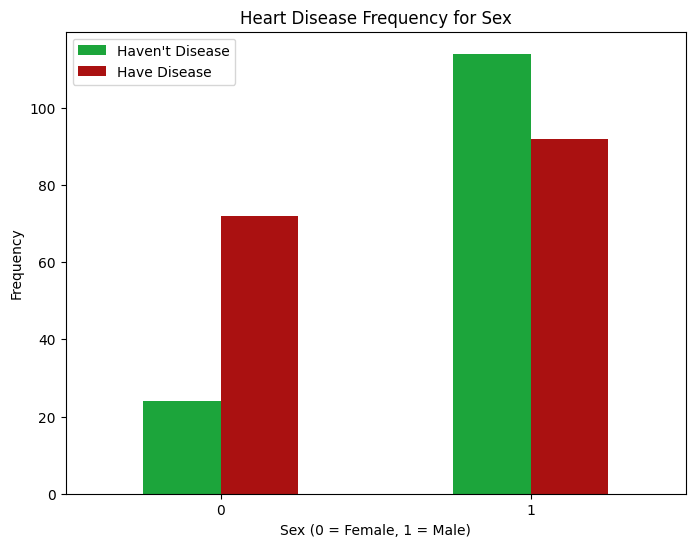

In [22]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(8,6),color=['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

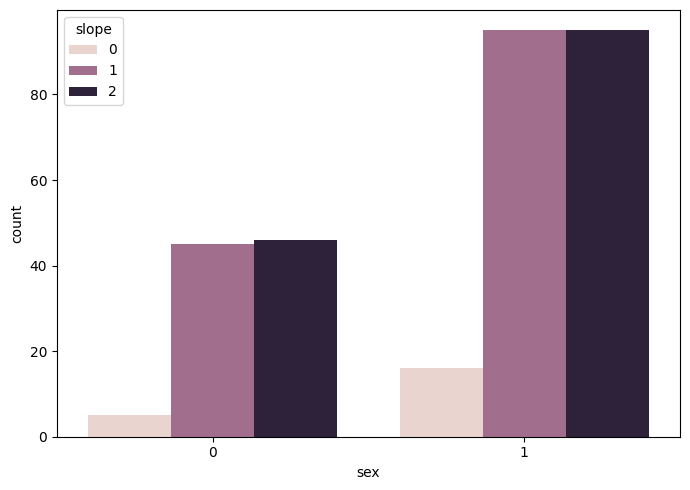

In [23]:
plt.figure(figsize=(7,5))
sns.countplot(x=df["sex"], hue=df["slope"])
plt.tight_layout()m

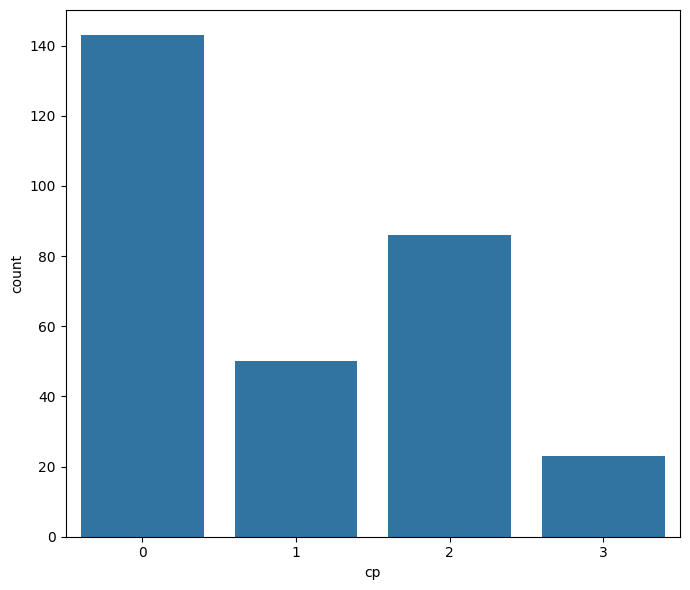

In [24]:
plt.figure(figsize=(7,6))
sns.countplot(x=df['cp'])
plt.tight_layout()

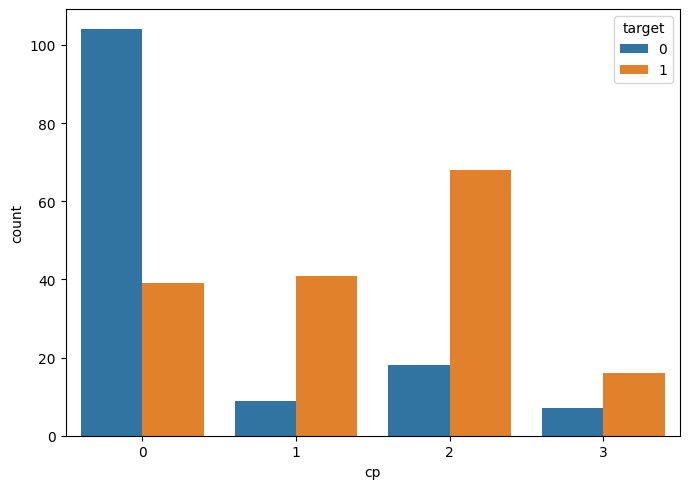

In [25]:
plt.figure(figsize=(7,5))
sns.countplot(x=df['cp'], hue=df["target"])
plt.tight_layout()

Text(36.804208333333335, 0.5, 'ST depression')

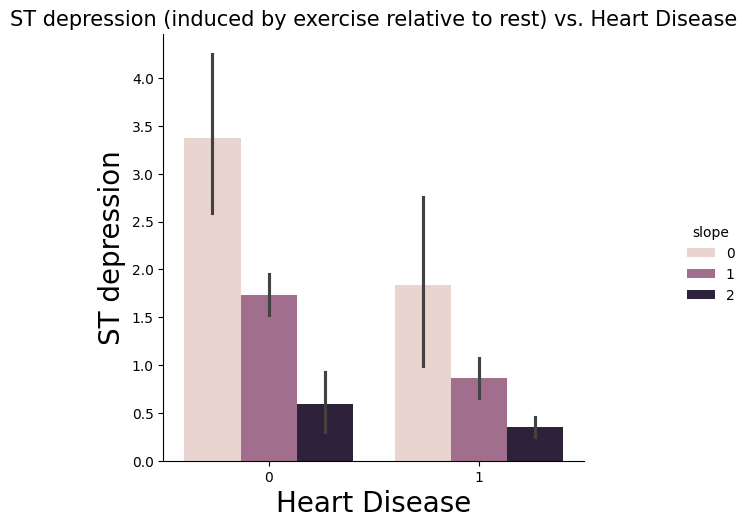

In [26]:
sns.catplot(x="target", y="oldpeak", hue="slope", kind="bar", data=df);

plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease', size=15)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20)

Text(0, 0.5, 'Thalach Level')

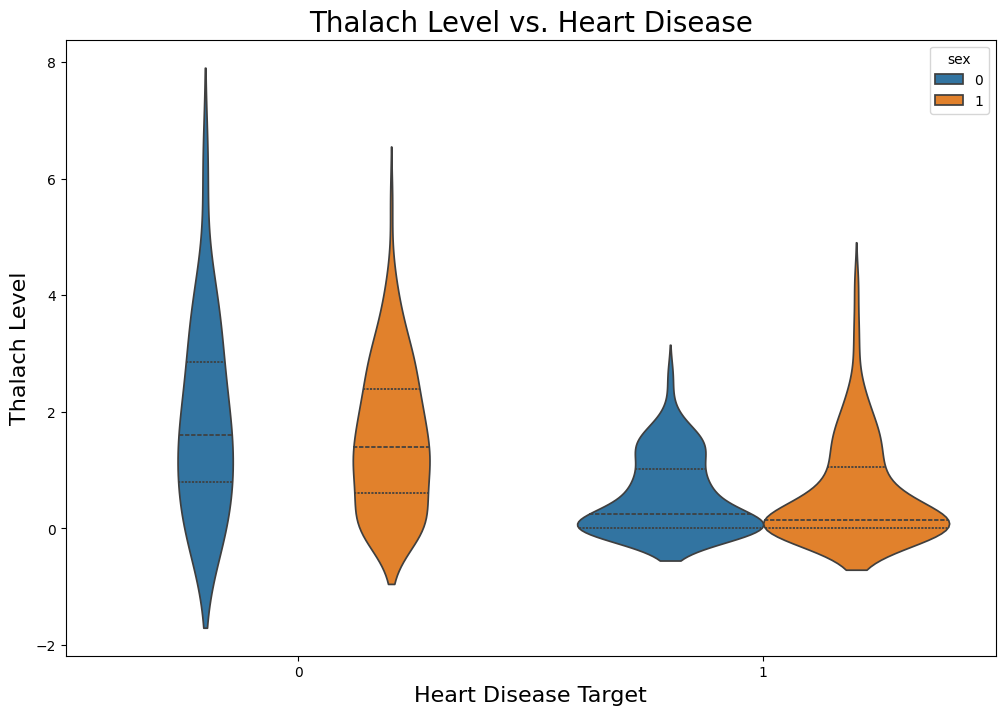

In [27]:
plt.figure(figsize=(12,8))
sns.violinplot(x='target', y='oldpeak', hue="sex", inner='quartile', data= df)
plt.title("Thalach Level vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("Thalach Level", fontsize=16)

Text(0, 0.5, 'ST depression induced by exercise relative to rest')

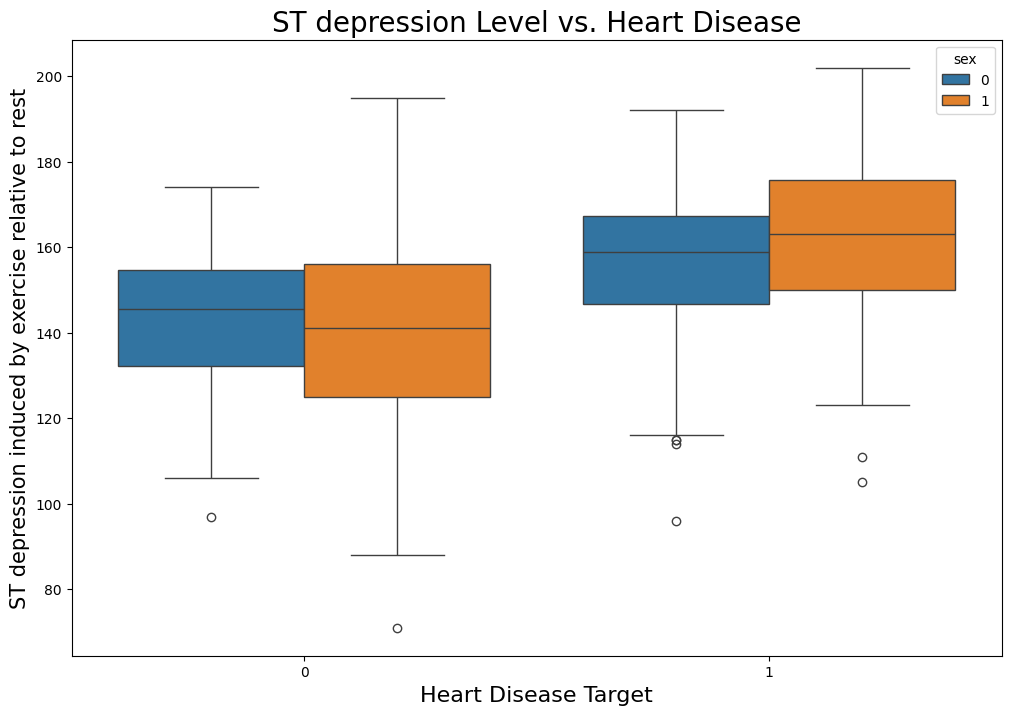

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(x='target', y='thalach', hue="sex", data=df)
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=15)

### Encoding the categorical data

scikit-learn also supports one hot encoding via LabelBinarizer and OneHotEncoder in its preprocessing module.

First, let’s understand the types of `categorical data`:

First, let’s understand the types of categorical data:
1. **Nominal Data:** The nominal data called labelled/named data. Allowed to change the order of categories, change in order doesn’t affect its value. For example, Gender (Male/Female/Other), Age Groups (Young/Adult/Old), etc.
2. **Ordinal Data:** Represent discretely and ordered units. Same as nominal data but have ordered/rank. Not allowed to change the order of categories. For example, Ranks: 1st/2nd/3rd, Education: (High School/Undergrads/Postgrads/Doctorate), etc.

Since `‘cp’`, `‘thal’`, `'restecg'` and `‘slope’` are categorical variables (Nominal attributes) we’ll perform one hot encoding on these variables.

**Note:** Refer to the following [link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) to understand one-hot encoding from sklearn



In [36]:
from sklearn.preprocessing import OneHotEncoder

# put categorical variables in a list
categorical_vars = ['cp', 'thal', 'restecg', 'slope']

# instantiate the one hot encoder
# Will return sparse matrix if set True else will return an array.
one_hot_encoder = OneHotEncoder(sparse=False)

In [37]:
encoded_vars = one_hot_encoder.fit_transform(df[categorical_vars]).astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [38]:
encoded_vars

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0]])

In [39]:
encoder_feature_names = one_hot_encoder.get_feature_names_out(categorical_vars)


In [40]:
encoder_feature_names

array(['cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1', 'thal_2',
       'thal_3', 'restecg_0', 'restecg_1', 'restecg_2', 'slope_0',
       'slope_1', 'slope_2'], dtype=object)

In [41]:
encoder_vars_df = pd.DataFrame(encoded_vars, columns = encoder_feature_names)


In [42]:
data_encoded = pd.concat([df.reset_index(drop=True), encoder_vars_df.reset_index(drop=True)], axis = 1)


In [43]:
data_encoded

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,0,1,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,0,1,0,1,0,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,0,0,1,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,...,0,0,0,1,0,1,0,0,1,0
298,45,1,3,110,264,0,1,132,0,1.2,...,0,0,0,1,0,1,0,0,1,0
299,68,1,0,144,193,1,1,141,0,3.4,...,0,0,0,1,0,1,0,0,1,0
300,57,1,0,130,131,0,1,115,1,1.2,...,0,0,0,1,0,1,0,0,1,0


In [44]:
data_encoded.drop(categorical_vars, axis = 1, inplace = True)

In [45]:
data_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2
0,63,1,145,233,1,150,0,2.3,0,1,...,0,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,0,1,0,0,1,0,1,0,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,1,0,1,0,0,0,0,1
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,1,0,0,1,0,0,0,1
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,1,0,0,1,0,0,0,1


In [46]:
X = data_encoded.drop('target', axis = 1) # Features
y = data_encoded['target'] # Label

In [47]:
scaler = MinMaxScaler()

In [48]:
X[["age"]] = scaler.fit_transform(X[["age"]])
X[["trestbps"]] = scaler.fit_transform(X[["trestbps"]])
X[["chol"]] = scaler.fit_transform(X[["chol"]])
X[["thalach"]] = scaler.fit_transform(X[["thalach"]])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
log_reg = LogisticRegression(max_iter=500, random_state=1)

t0 = time()

log_reg.fit(X_train, y_train)

print("done in %0.3fs" % (time() - t0))

done in 0.029s


In [51]:
y_pred = log_reg.predict(X_test)

In [52]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [53]:
# For retrieving the slope use 'log_reg.coef_'
print('Coefficients: ', log_reg.coef_)

# To retrieve the intercept
print('Intercept: ', log_reg.intercept_)

Coefficients:  [[-0.05401498 -1.16680598 -0.57381961 -0.33301507 -0.09591213  0.8401409
  -0.53580913 -0.47101728 -0.94424952 -1.0143334  -0.05262797  0.44326852
   0.62352368 -0.17690238  0.22069509  0.64753124 -0.69149311 -0.0162602
   0.21476816 -0.19867713  0.15930254 -0.47390721  0.3144355 ]]
Intercept:  [2.25238151]


In [54]:
# Storing the actuals and predictions in a dictionary to see the results
actual = []
predcition = []

for i,j in zip(y_test, y_pred):
  actual.append(i)
  predcition.append(j)

dic = {'Actual':actual,
       'Prediction':predcition
       }
result  = pd.DataFrame(dic)

In [55]:
result

,Actual,Prediction
0,0,0
1,1,1
2,0,0
3,0,0
4,1,0
...,...,...
56,1,1
57,0,1
58,1,1
59,1,1


In [56]:
print(accuracy_score(y_test, y_pred))

0.8852459016393442


In [57]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

True negatives:  23 
False positives:  4 
False negatives:  3 
True positives:  31


In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



<Axes: >

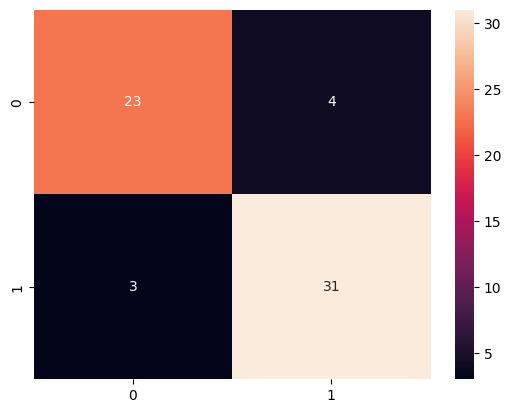

In [59]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)